In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt       

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [3]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost
    return total_cost

In [4]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [11]:
def gradient_descent(x,y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in) # to avoid modifying global w_in 
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:
            J_history.append( cost_function(x,y,w,b))
            p_history.append([w,b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}. dj_db: {dj_db: 0.3e}",
                  f"w: {w: 0.3e}, b: {b: 0.5e}")
    return w, b, J_history, p_history

In [12]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02. dj_db: -4.000e+02 w:  6.500e+00, b:  4.00000e+00
iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01. dj_db:  6.007e-01 w:  1.949e+02, b:  1.08228e+02
iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01. dj_db:  2.895e-01 w:  1.975e+02, b:  1.03966e+02
iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02. dj_db:  1.396e-01 w:  1.988e+02, b:  1.01912e+02
iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02. dj_db:  6.727e-02 w:  1.994e+02, b:  1.00922e+02
iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02. dj_db:  3.243e-02 w:  1.997e+02, b:  1.00444e+02
iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03. dj_db:  1.563e-02 w:  1.999e+02, b:  1.00214e+02
iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03. dj_db:  7.535e-03 w:  1.999e+02, b:  1.00103e+02
iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03. dj_db:  3.632e-03 w:  2.000e+02, b:  1.00050e+02
iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03. dj_db:  1.751e-03 w:  2.000e+02, b:  1.00024e+02
(w,b) foun

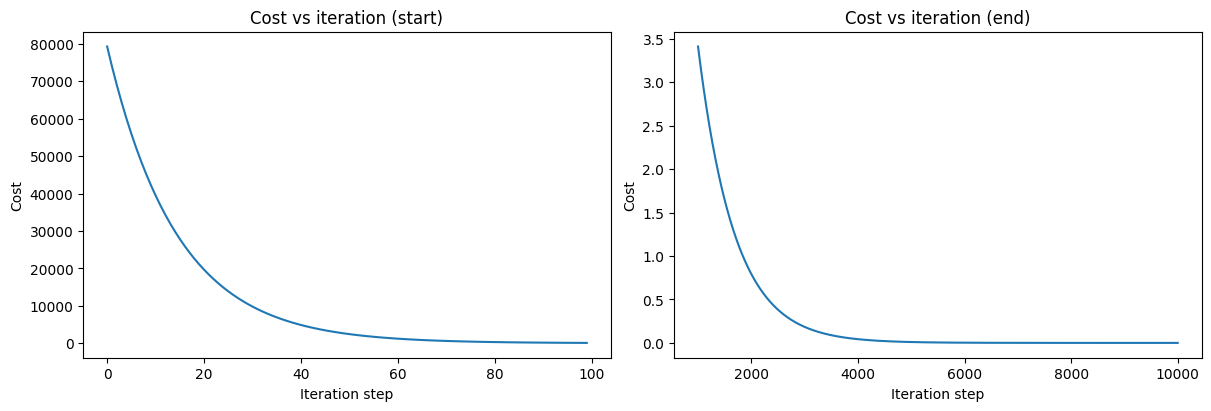

In [16]:
#plotting cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs iteration (start)")
ax2.set_title("Cost vs iteration (end)")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration step")
ax2.set_xlabel("Iteration step")

plt.show()

In [17]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


Increasing Learning Rate

In [19]:
w_init = 0
b_init = 0

iterations = 10
tmp_alpha = 8.0e-1

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02. dj_db: -4.000e+02 w:  5.200e+02, b:  3.20000e+02
iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03. dj_db:  7.000e+02 w: -3.840e+02, b: -2.40000e+02
iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03. dj_db: -1.216e+03 w:  1.192e+03, b:  7.32800e+02
iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03. dj_db:  2.121e+03 w: -1.551e+03, b: -9.63840e+02
iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03. dj_db: -3.691e+03 w:  3.228e+03, b:  1.98886e+03
iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04. dj_db:  6.431e+03 w: -5.095e+03, b: -3.15579e+03
iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04. dj_db: -1.120e+04 w:  9.402e+03, b:  5.80237e+03
iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04. dj_db:  1.950e+04 w: -1.584e+04, b: -9.80139e+03
iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04. dj_db: -3.397e+04 w:  2.813e+04, b:  1.73730e+04
iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04. dj_db:  5.916e+04 w: -4.845e+04, b: -2.99567e+04
